# Import Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import RFE

# Import Dataset

In [ ]:
#Read Data and Checking Null Values
df=pd.read_csv('titanic.csv')
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


Split the data for training and testing

In [ ]:
#Split x and y
x=df.drop(columns=["Survived"])
y=df["Survived"]

#Split data for testing and training
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=26)

Fill null value of train_df

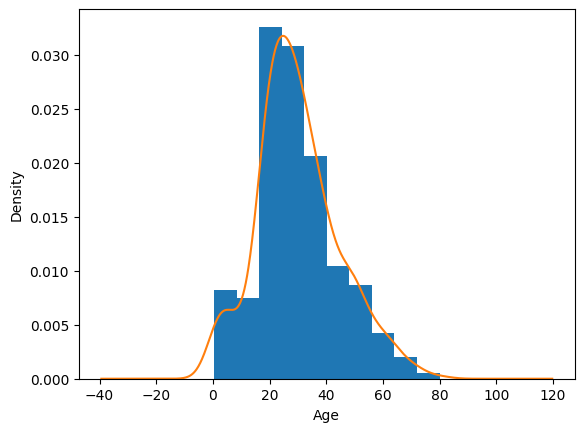

In [ ]:
train_df=pd.concat([x_train, y_train], axis=1)

#Age filled with median because skewed distribution
ax = train_df["Age"].hist(density=True, stacked=True)
train_df["Age"].plot(kind='density')
ax.set(xlabel='Age')
plt.show()

train_df["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)

Drop Cabin because too much missing value

In [ ]:
train_df=train_df.drop(columns=["Cabin"])

Fill embarked data with most embarked value because only 2 data missing

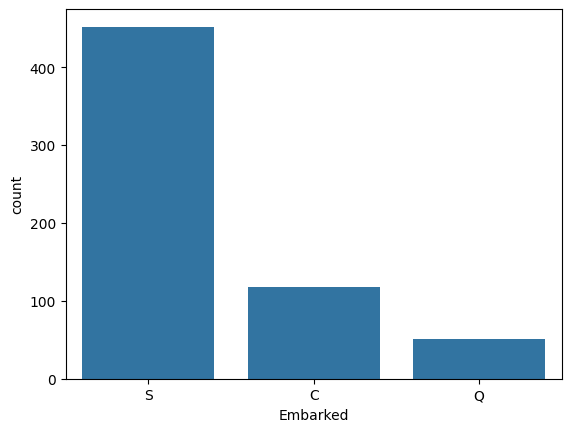

<ipython-input-74-fcda328ede36>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)


In [ ]:
sns.countplot(x='Embarked', data=train_df)
plt.show()

train_df["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)

Make additional variable.
Create categorical variable for traveling alone, drop SibSp and Parch (Is the individual travelling alona or not)

In [ ]:
train_df['TravelAlone']=np.where((train_df["SibSp"]+train_df["Parch"])>0, 0, 1)
train_df.drop('SibSp', axis=1, inplace=True)
train_df.drop('Parch', axis=1, inplace=True)

create categorical variables and drop some variables. Make dummies for 3 categorical variable

In [ ]:
train_df=pd.get_dummies(train_df, columns=["Pclass","Embarked","Sex"])

#id is irrelevant
train_df.drop('PassengerId', axis=1, inplace=True)

#name is irrelevant
train_df.drop('Name', axis=1, inplace=True)

#ticket categories is too much
train_df.drop('Ticket', axis=1, inplace=True)

train_df.head()

,Age,Fare,Survived,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
592,47.0,7.2500,0,1,False,False,True,False,False,True,False,True
672,70.0,10.5000,0,1,False,True,False,False,False,True,False,True
847,35.0,7.8958,0,1,False,False,True,True,False,False,False,True
36,28.0,7.2292,1,1,False,False,True,True,False,False,False,True
455,29.0,7.8958,1,1,False,False,True,True,False,False,False,True


Apply the same changes to testing data

In [ ]:
test_df=pd.concat([x_test, y_test], axis=1)

test_df["Age"].fillna(test_df["Age"].median(skipna=True), inplace=True)
test_df=test_df.drop(columns=["Cabin"])
test_df["Embarked"].fillna(test_df['Embarked'].value_counts().idxmax(), inplace=True)
test_df['TravelAlone']=np.where((test_df["SibSp"]+test_df["Parch"])>0, 0, 1)
test_df.drop('SibSp', axis=1, inplace=True)
test_df.drop('Parch', axis=1, inplace=True)
test_df=pd.get_dummies(test_df, columns=["Pclass","Embarked","Sex"])
# test_df.drop('Sex_female', axis=1, inplace=True)
test_df.drop('PassengerId', axis=1, inplace=True)
test_df.drop('Name', axis=1, inplace=True)
test_df.drop('Ticket', axis=1, inplace=True)

test_df.head()

<ipython-input-77-cf7d7d4e5d4b>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_df["Age"].fillna(test_df["Age"].median(skipna=True), inplace=True)
<ipython-input-77-cf7d7d4e5d4b>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

,Age,Fare,Survived,TravelAlone,Pclass_1,Pclass_2,Pclass_3,Embarked_C,Embarked_Q,Embarked_S,Sex_female,Sex_male
831,0.83,18.7500,1,0,False,True,False,False,False,True,False,True
123,32.50,13.0000,1,1,False,True,False,False,False,True,True,False
245,44.00,90.0000,0,0,True,False,False,False,True,False,False,True
116,70.50,7.7500,0,1,False,False,True,False,True,False,False,True
663,36.00,7.4958,0,1,False,False,True,False,False,True,False,True


split data for model training

In [ ]:
x_train=train_df.drop(columns=["Survived"])
y_train=train_df["Survived"]

x_test=test_df.drop(columns=["Survived"])
y_test=test_df["Survived"]

#Feature Selection

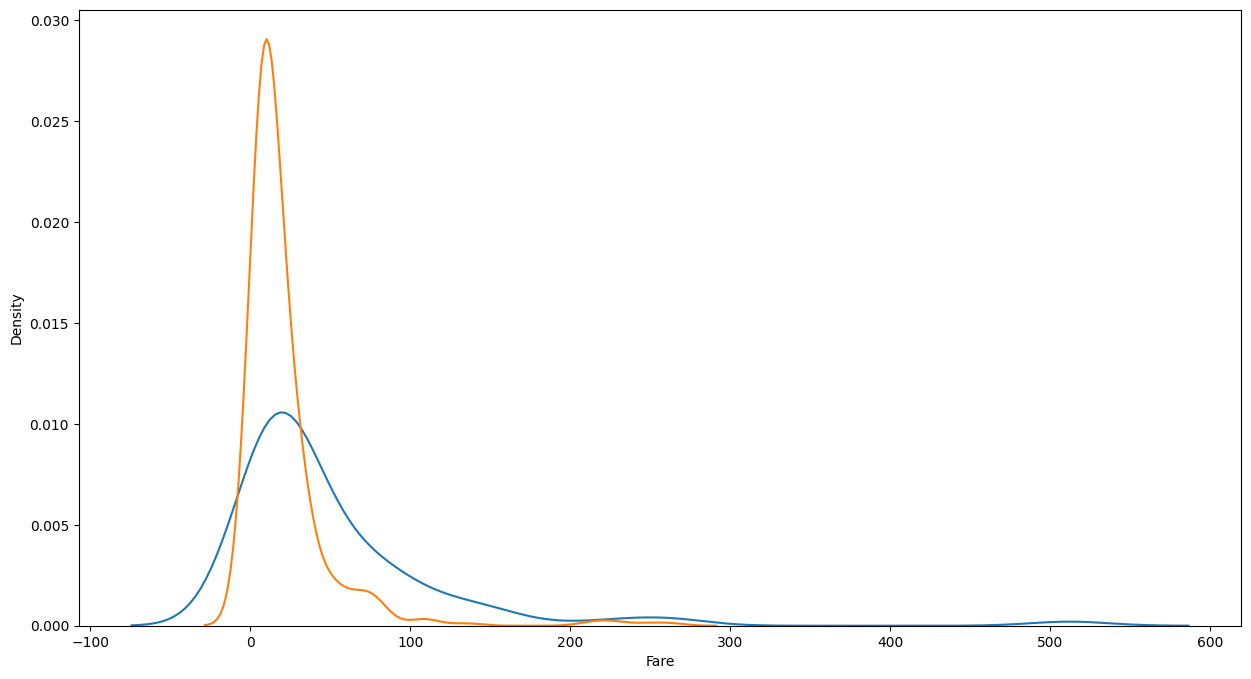

In [ ]:
#Fare Exploration
plt.figure(figsize=(15,8))
ax = sns.kdeplot(train_df["Fare"][train_df.Survived == 1])
sns.kdeplot(train_df["Fare"][train_df.Survived == 0])
ax.set(xlabel='Fare')
plt.show()

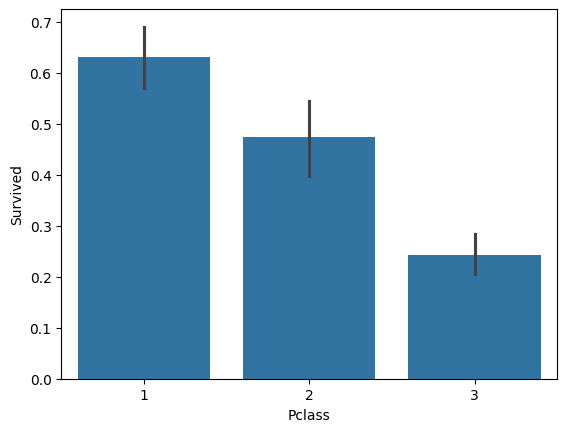

In [ ]:
#Passenger Class Exploration
sns.barplot(x='Pclass', y='Survived', data=df)
plt.show()

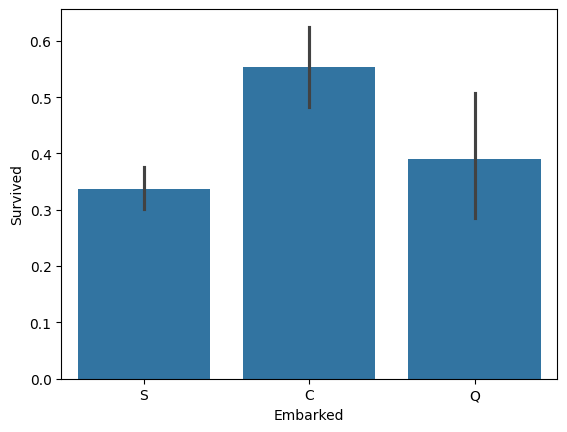

In [ ]:
#Embarked Exploration
sns.barplot(x='Embarked', y='Survived', data=df)
plt.show()

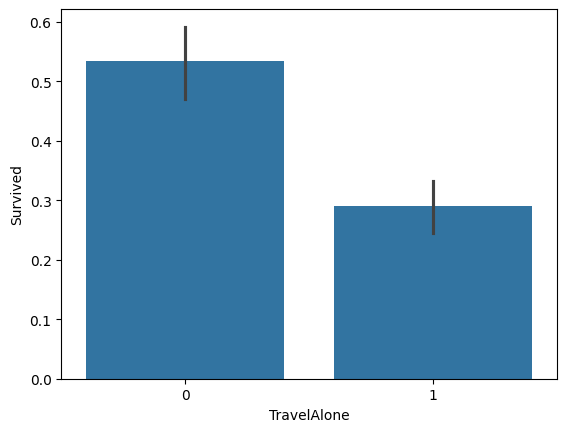

In [ ]:
#Traveling Alone exploration
sns.barplot(x='TravelAlone', y='Survived', data=train_df)
plt.show()

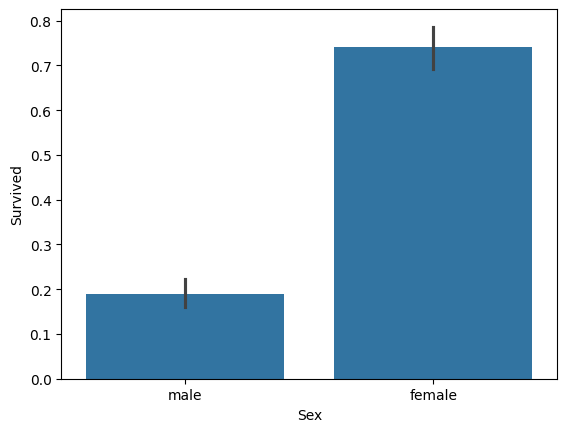

In [ ]:
#Sex exploration
sns.barplot(x='Sex', y='Survived', data=df)
plt.show()

select feature using RFE

In [ ]:
cols = ["Age","Fare","TravelAlone","Pclass_1","Pclass_2","Embarked_C","Embarked_S","Sex_male"]
X = train_df[cols]
y = train_df['Survived']

model = LogisticRegression()

rfe = RFE(estimator=model, n_features_to_select=8)
rfe = rfe.fit(X, y)

print('Selected features: %s' % list(X.columns[rfe.support_]))

Selected features: ['Age', 'Fare', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_male']


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
#select feature
feature = ['Age', 'TravelAlone', 'Pclass_1', 'Pclass_2', 'Embarked_C', 'Embarked_S', 'Sex_female']
x_train = train_df[feature]
x_test = test_df[feature]

In [ ]:
#model training
model=LogisticRegression(max_iter=1000, tol=1e-10)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

#print result
print(classification_report(y_test,y_pred))

print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("f1_score: ", f1_score(y_test,y_pred))
print("AUC-ROC: ", roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       165
           1       0.73      0.70      0.71       103

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268

Accuracy:  0.7835820895522388
Precision:  0.7272727272727273
Recall:  0.6990291262135923
f1_score:  0.7128712871287128
AUC-ROC:  0.7676963812886144


Try another approach using another variables

In [ ]:
second_df = df[['Survived', 'Age', 'Sex', 'Pclass']]
second_df = pd.get_dummies(second_df, columns=['Sex', 'Pclass'])
second_df.dropna(inplace=True)
second_df.head()

x = second_df.drop('Survived', axis=1)
y = second_df['Survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=0)

In [ ]:
select=['Age',	'Sex_female',	'Sex_male',	'Pclass_1',	'Pclass_2' ,'Pclass_3']
x_train=x_train[select]
x_test=x_test[select]

In [ ]:
#model training
model=LogisticRegression(max_iter=1000, tol=1e-20)
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

#print result
print(classification_report(y_test,y_pred))

print("Accuracy: ", accuracy_score(y_test,y_pred))
print("Precision: ", precision_score(y_test,y_pred))
print("Recall: ", recall_score(y_test,y_pred))
print("f1_score: ", f1_score(y_test,y_pred))
print("AUC-ROC: ", roc_auc_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.92      0.87        85
           1       0.85      0.71      0.77        58

    accuracy                           0.83       143
   macro avg       0.84      0.81      0.82       143
weighted avg       0.83      0.83      0.83       143

Accuracy:  0.8321678321678322
Precision:  0.8541666666666666
Recall:  0.7068965517241379
f1_score:  0.7735849056603774
AUC-ROC:  0.8122718052738336
